# Time Series Analysis

### This script contains the following:
#### 1. Importing Libraries and Data
#### 2. Subsetting, Wrangling and Cleaning
#### 3. Decomposition
#### 4. Testing for stationarity
#### 5. Stationarising the data

### 1. Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import warnings

warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [2]:
path = r'C:\Users\mosh_\OneDrive\Desktop\Career Foundry\Data Immersion\Achievement 6 - Advanced Analytics and Dashbooard Design'

In [5]:
path

'C:\\Users\\mosh_\\OneDrive\\Desktop\\Career Foundry\\Data Immersion\\Achievement 6 - Advanced Analytics and Dashbooard Design'

In [7]:
happy = pd.read_csv(os.path.join(path, 'data', 'happy_years.csv'))

In [9]:
happy.head()

,Overall rank,Country or region,Year,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,153,Afghanistan,2015,3.575,0.3198,0.3029,0.3034,0.2341,0.3651,0.0972
1,154,Afghanistan,2016,3.360,0.3823,0.1104,0.1734,0.1643,0.3127,0.0711
2,141,Afghanistan,2017,3.794,0.4015,0.5815,0.1807,0.1062,0.3119,0.0612
3,145,Afghanistan,2018,3.632,0.3320,0.5370,0.2550,0.0850,0.1910,0.0360
4,154,Afghanistan,2019,3.203,0.3500,0.5170,0.3610,0.0000,0.1580,0.0250


### 2. Subsetting, Wrangling and Cleaning

In [11]:
# Subset data to keep only years from 2015 onwards
happy_subset = happy[happy['Year'] >= 2015].copy()

# Convert 'Year' to a datetime object (if needed)
happy_subset['Year'] = pd.to_datetime(happy_subset['Year'], format='%Y')

# Reset index
happy_subset = happy_subset.reset_index(drop=True)

# Set 'Year' as index (time-series format)
happy_subset.set_index('Year', inplace=True)

# Display first few rows after subsetting
print(happy_subset.head())

            Overall rank Country or region  Score  GDP per capita  \
Year                                                                
2015-01-01           153       Afghanistan  3.575          0.3198   
2016-01-01           154       Afghanistan  3.360          0.3823   
2017-01-01           141       Afghanistan  3.794          0.4015   
2018-01-01           145       Afghanistan  3.632          0.3320   
2019-01-01           154       Afghanistan  3.203          0.3500   

            Social support  Healthy life expectancy  \
Year                                                  
2015-01-01          0.3029                   0.3034   
2016-01-01          0.1104                   0.1734   
2017-01-01          0.5815                   0.1807   
2018-01-01          0.5370                   0.2550   
2019-01-01          0.5170                   0.3610   

            Freedom to make life choices  Generosity  \
Year                                                   
2015-01-01        

In [43]:
# Resample by year and calculate the mean Happiness Score
happy_group = happy_subset.resample('Y')['Score'].mean()

# Convert the Series to DataFrame and reset the column name if needed
happy_group = happy_group.to_frame()

# Display the result
print(happy_group.head())


               Score
Year                
2015-12-31  5.375734
2016-12-31  5.382185
2017-12-31  5.354019
2018-12-31  5.375917
2019-12-31  5.407096


In [27]:
happy_group

Year
2015-12-31    5.375734
2016-12-31    5.382185
2017-12-31    5.354019
2018-12-31    5.375917
2019-12-31    5.407096
Freq: YE-DEC, Name: Score, dtype: float64

In [19]:
happy_group.index = happy_group.index.year

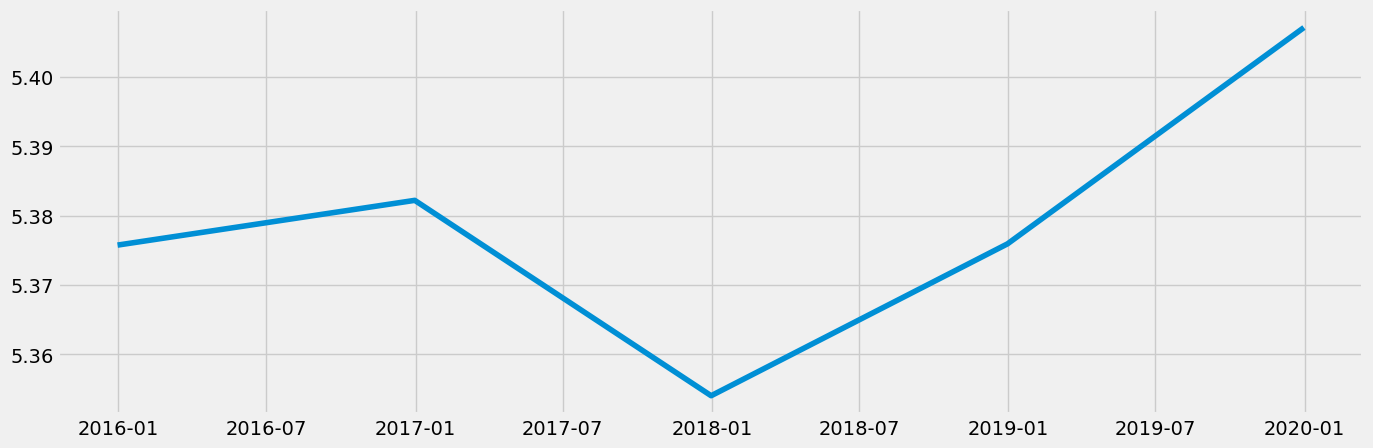

In [29]:
# plotting the data

plt.figure(figsize=(15,5), dpi=100)
plt.plot(happy_group)

### 3. Decomposition

In [35]:
# Perform seasonal decomposition
decomposition = sm.tsa.seasonal_decompose(happy_group, model='additive')


In [37]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

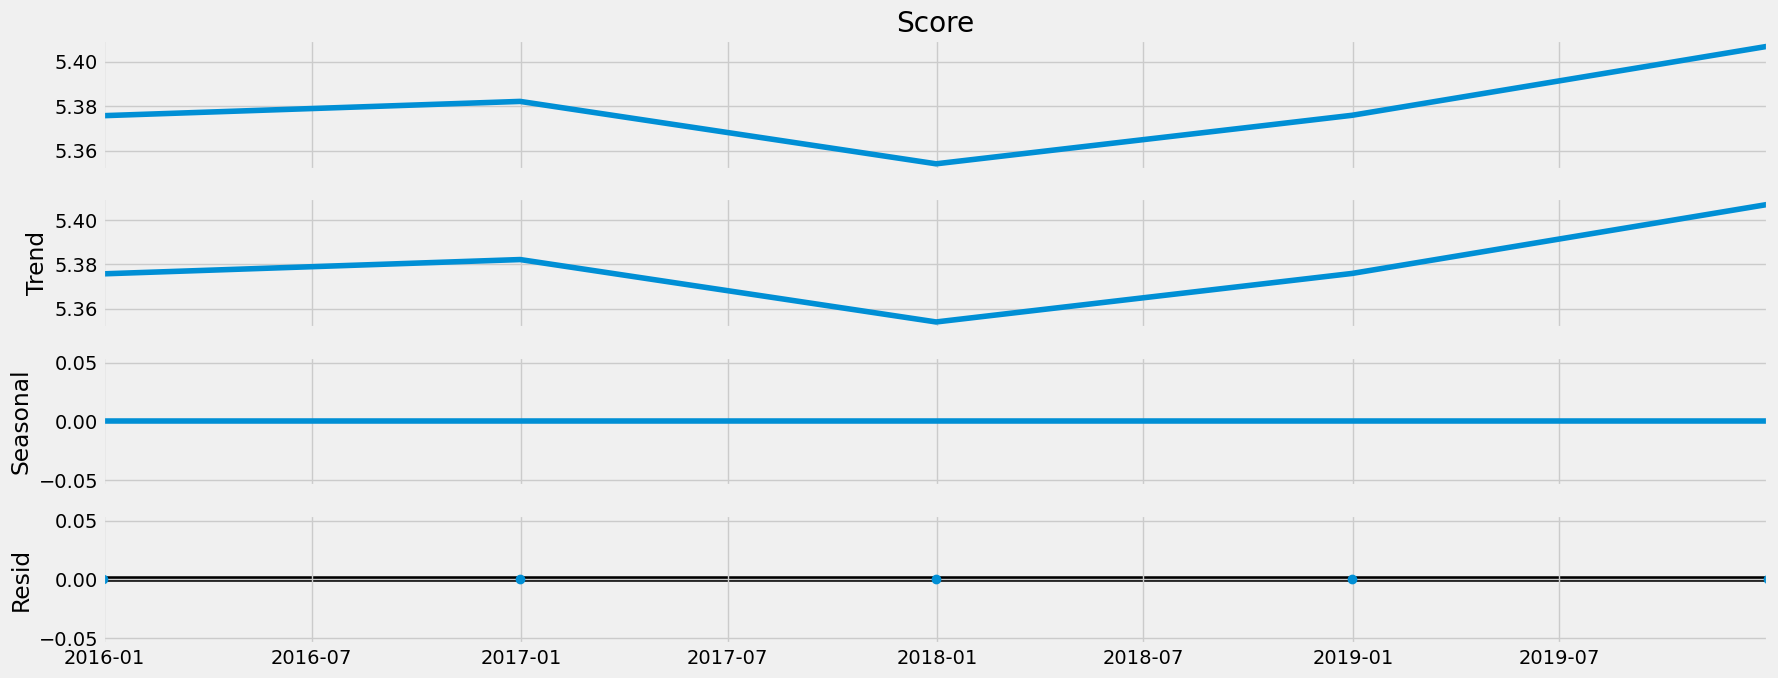

In [39]:
decomposition.plot()
plt.show()

### 4. Testing for stationarity

In [45]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(happy_group['Score'])

Dickey-Fuller Stationarity test:
Test Statistic                -0.937653
p-value                        0.775320
Number of Lags Used            0.000000
Number of Observations Used    4.000000
Critical Value (1%)           -7.355441
Critical Value (5%)           -4.474365
Critical Value (10%)          -3.126933
dtype: float64


Null hypothesis: the presence of a root unit.
<BR>
Alternative hypothesis: there is no root unit

All 3 critical values are smaller than the test statistic. This imply the data is non-stationary and we can't reject the hypothesis

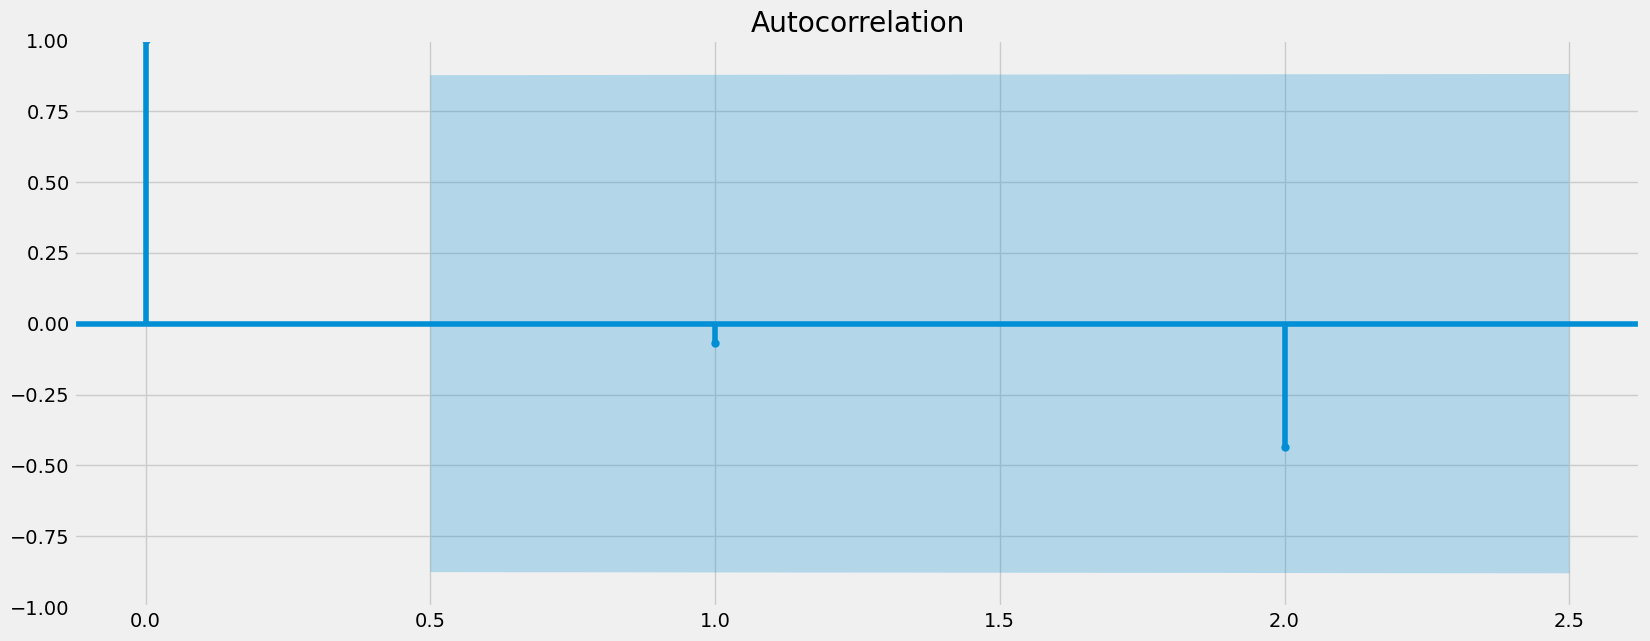

In [49]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(happy_group)
plt.show()

### 5. Stationarising the data

In [54]:
data_diff = happy_group - happy_group.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)
data_diff.dropna(inplace = True)

In [56]:
data_diff.head()

,Score
Year,
2016-12-31,0.006451
2017-12-31,-0.028165
2018-12-31,0.021897
2019-12-31,0.031179


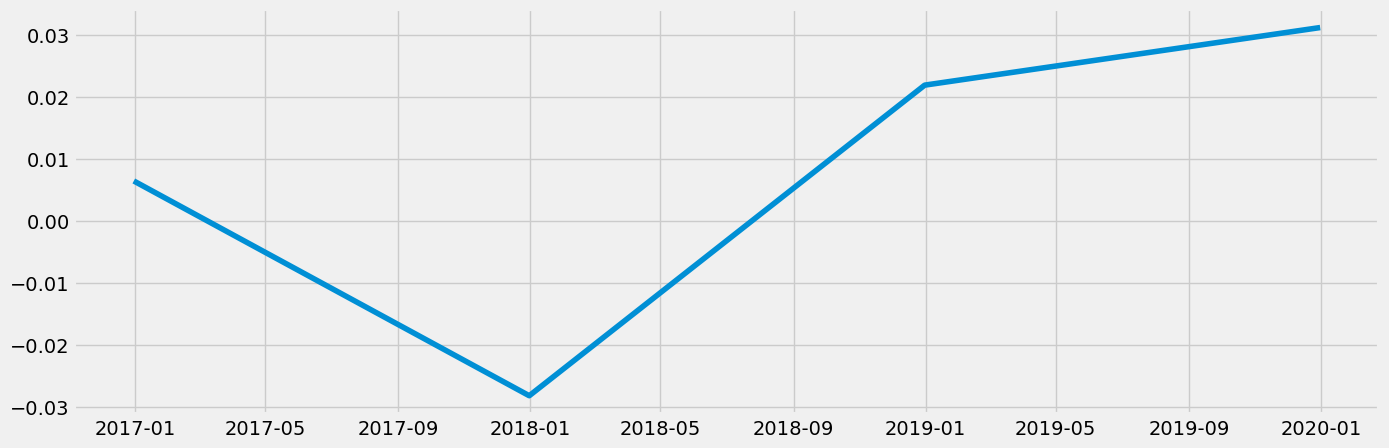

In [58]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [60]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -0.876918
p-value                         0.795478
Number of Lags Used             0.000000
Number of Observations Used     3.000000
Critical Value (1%)           -10.417191
Critical Value (5%)            -5.778381
Critical Value (10%)           -3.391681
dtype: float64


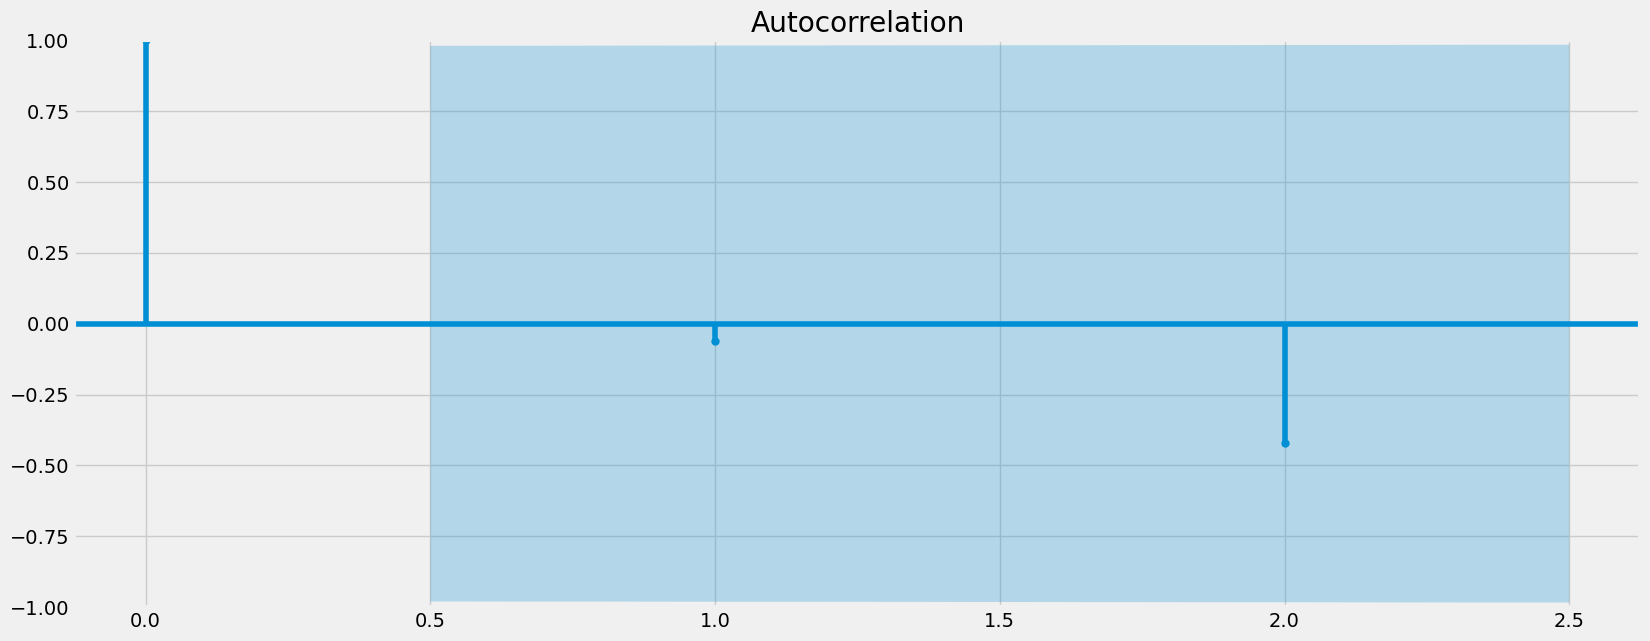

In [62]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(data_diff)
plt.show()